# Diabetes

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [4]:
#Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [5]:
#Use only the BMI feature
diabetes_X = diabetes_X.loc[:,['bmi']]
#the bmi is zero-centered and localized; recenter for presentation sake
diabetes_X = diabetes_X*30+25

In [6]:
#Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

In [7]:
#Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


Text(0, 0.5, 'Diabetes Risk')

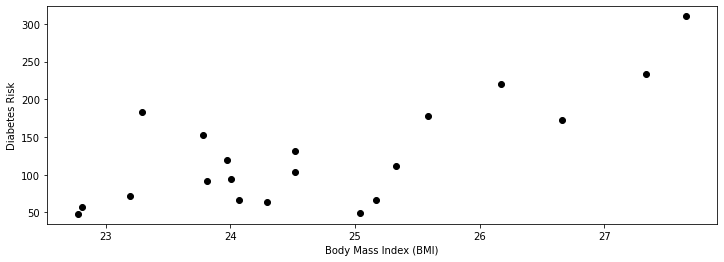

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]

plt.scatter(diabetes_X_train,diabetes_y_train, color= 'black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

# Finding a linear fit curve

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [39]:
#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model using the traning sets
regr.fit(diabetes_X_train, diabetes_y_train)

#The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercepet (theta0): \t', regr.intercept_)

Slope (theta1): 	 37.378842160517664
Intercepet (theta0): 	 -797.0817390342369


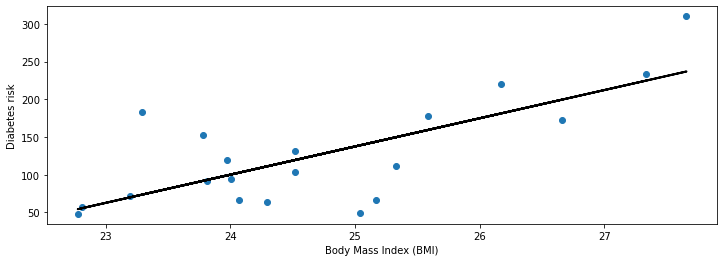

In [42]:
#Predictions on training data
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes risk')

diabetes_y_train_pred = regr.predict(diabetes_X_train)

plt.scatter(diabetes_X_train,diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

# Testing the model

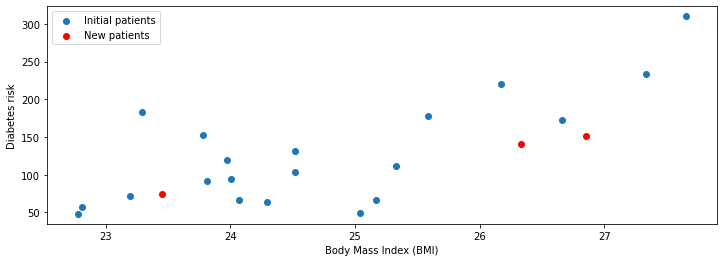

In [43]:
#Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes risk')
plt.legend(['Initial patients', 'New patients'])

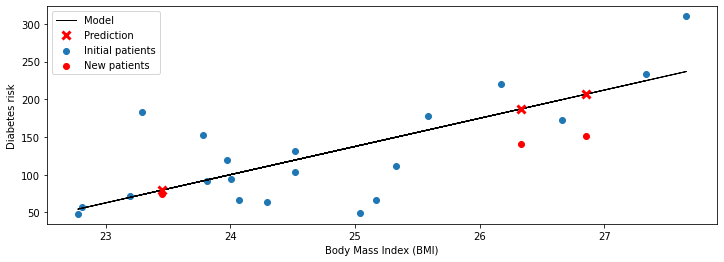

In [51]:
#Generating predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

#Visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red', marker = 'o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color = 'black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3,markersize=8)
plt.legend(['Model','Prediction','Initial patients','New patients'])

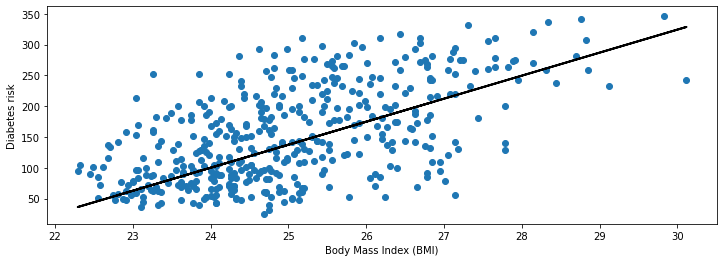

In [41]:
#testing on full data
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes risk')

diabetes_y_train_pred = regr.predict(diabetes_X)

plt.scatter(diabetes_X,diabetes_y)
plt.plot(diabetes_X, diabetes_y_train_pred, color='black', linewidth=2)